In [5]:
%load_ext autoreload
%autoreload 2

import os
os.environ['DISPLAY'] = ':1'
os.environ['NAPARI_ASYNC'] = '1'


from SyMBac.simulation import Simulation
from SyMBac.PSF import PSF_generator
from SyMBac.renderer import Renderer
from SyMBac.PSF import Camera
from SyMBac.misc import get_sample_images
real_image = get_sample_images()["E. coli 100x"]
from joblib import Parallel, delayed


my_simulation = Simulation(
    trench_length=15,
    trench_width=1.15,
    cell_max_length=6.65, #6, long cells # 1.65 short cells
    cell_width= 1, #1 long cells # 0.95 short cells
    sim_length = 200,
    pix_mic_conv = 0.065,
    gravity=0,
    phys_iters=15,
    max_length_var = 0.,
    width_var = 0.,
    lysis_p = 0.00,
    save_dir="/tmp/test/",
    resize_amount = 3,
)

my_simulation.run_simulation()

  0%|          | 0/202 [00:00<?, ?it/s]

In [8]:
my_simulation.cell_timeseries[0][0].t

4

/home/gh464/miniconda3/envs/symbac/lib/python3.10/site-packages/bioscrape/sbmlutil.py:56: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


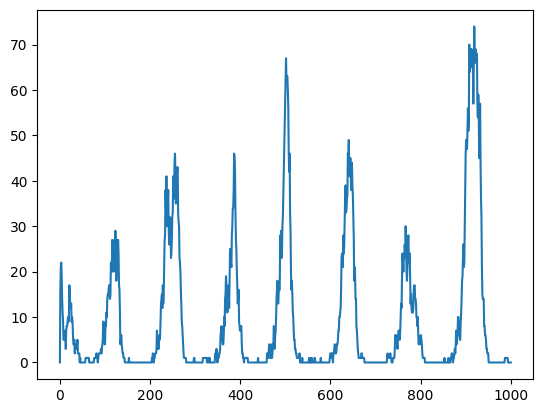

In [14]:
from bioscrape.types import Model
# Load an SBML file repressilator.xml 
# (you can find this file in `examples/models` directory)
M = Model(sbml_filename = 'repressilator_sbml.xml')
# Simulate the model
from bioscrape.simulator import py_simulate_model
import numpy as np
tp = np.linspace(0,1000,1000)
x0 = {"dna_lacI_tetR": 3, "dna_tetR_lacI":3}
result = py_simulate_model(timepoints=tp, Model=M, stochastic=True, initial_consdition_dsdsict = x0)
# Plot the simulation result (the result is a Pandas dataframe)
import matplotlib.pyplot as plt
plt.plot(tp, result['X'])

In [11]:
help(Model)

Help on class Model in module bioscrape.types:

class Model(builtins.object)
 |  A class for keeping track of a chemical reaction model with delays. Does not support volumes, those are supplied
 |  externally.
 |  
 |  Attributes:
 |      _next_species_index (unsigned): used internally for indexing
 |      _next_params_index (unsigned): used internally for indexing
 |      c_propensities (void *): vector of pointers to the model propensity objects. Must cast back to Propensity type
 |      c_delays (void *): vector of pointers to model delay objects. Must cast back to Delay type
 |      propensities (list): List of propensity objects. same contents as c_propensities but slower access
 |      delays (list): List of delay objects. Same contents as c_delays but slower access
 |      species2index (dict:str -> int): maps species names to index in species state vector.
 |      params2index (dict:str -> int): maps parameter names to index in parameter vector.
 |      species_values (np.ndarr